In [1]:
class Graph:
    
    def __init__(self,nodes,is_directed=False):
        self.nodes=nodes
        self.adj_list={}
        self.is_directed=is_directed
        for node in self.nodes:
            self.adj_list[node]=[]
   

    def print_adj(self):
        for node in self.nodes:
            print(node,"=>",self.adj_list[node])
        return
    
    def add_edge(self,u,v):
        if self.is_directed:
            self.adj_list[u].append(v)
        else:
            self.adj_list[u].append(v)
            self.adj_list[v].append(u)
       
    
    def degree(self,node):
        return len(self.adj_list[node])
        
       

In [2]:
nodes=["A","B","C","D","E"]
graph=Graph(nodes,True)
graph.print_adj()

A => []
B => []
C => []
D => []
E => []


In [3]:
all_edges=[("A","B"),("A","C"),("C","D"),("B","D"),("B","E"),("D","E")]
for (u,v) in all_edges:
    graph.add_edge(u,v)

graph.print_adj()

A => ['B', 'C']
B => ['D', 'E']
C => ['D']
D => ['E']
E => []


In [4]:
graph.degree("C")

1

### Graph Breadth First Search and Depth First Search

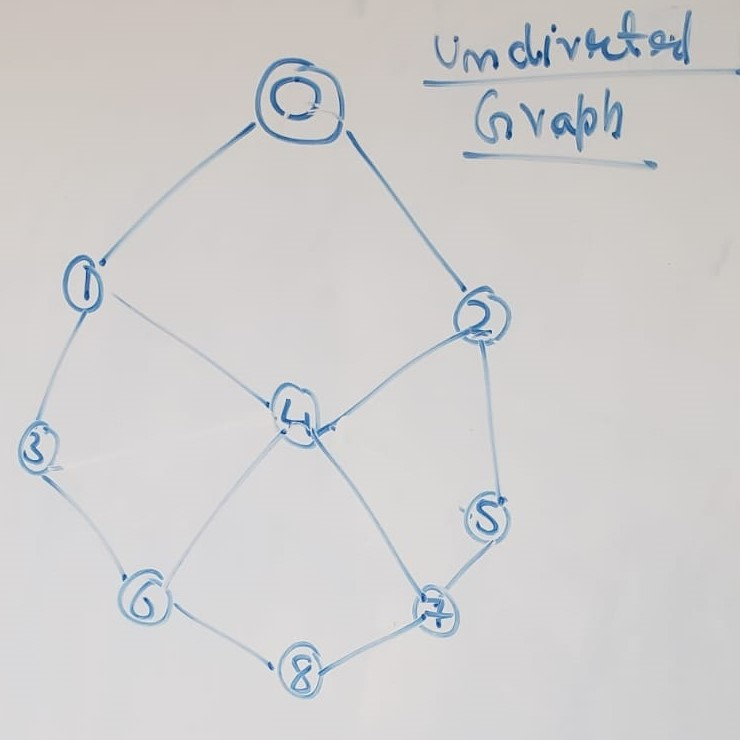

In [5]:
from IPython.display import Image
Image(filename='graph.jpeg',height=2)

In [46]:
from queue import Queue
from collections import deque
import random

class Graph:
    
    def __init__(self,nodes,is_directed=False):
        self.nodes=nodes
        self.adj_list={}
        self.is_directed=is_directed
        for node in self.nodes:
            self.adj_list[node]=[]
   

    def print_adj(self):
        for node in self.nodes:
            print(node,"=>",self.adj_list[node])
        return
    
    def add_edge(self,u,v):
        if self.is_directed:
            self.adj_list[u].append(v)
        else:
            self.adj_list[u].append(v)
            self.adj_list[v].append(u)
    
    def breadth_first_search(self,root_node,lstr):
        q=Queue()
        array=[False]*len(self.adj_list)
        q.put(root_node)
        array[root_node]=True
        while(q.qsize()>0):
            temp=q.get()
            lstr=lstr+"->"+str(temp)
            for neighbour in self.adj_list[temp]:
                if array[neighbour]!=True:
                    q.put(neighbour)
                    array[neighbour]=True
        return lstr
    
    def depth_first_search(self,root_node,lstr):
        stack=deque()
        array=[False]*len(self.adj_list)
        stack.append(root_node)
        while(len(stack)>0):
            top=stack.pop()
            if array[top]!=True:
                lstr=lstr+"->"+str(top)
                array[top]=True
            for node in self.adj_list[top]:
                if array[node]==False:
                    stack.append(node)
        return lstr
            
            
    def degree(self,node):
        return len(self.adj_list[node])
        
       

In [47]:
nodes=[0,1,2,3,4,5,6,7,8]
graph=Graph(nodes,True)
graph.print_adj()

0 => []
1 => []
2 => []
3 => []
4 => []
5 => []
6 => []
7 => []
8 => []


In [48]:
all_edges=[(0,1),(0,2),(1,3),(1,4),(1,0),(2,4),(2,5),
           (2,0),(3,1),(3,6),(3,4),(4,1),(4,6),(4,2),
           (4,7),(5,2),(5,7),(6,3),(6,8),(6,4),(6,7),
           (7,4),(7,8),(7,5),(8,6),(8,7)]
for u,v in all_edges:
    graph.add_edge(u,v)
graph.print_adj()    

0 => [1, 2]
1 => [3, 4, 0]
2 => [4, 5, 0]
3 => [1, 6, 4]
4 => [1, 6, 2, 7]
5 => [2, 7]
6 => [3, 8, 4, 7]
7 => [4, 8, 5]
8 => [6, 7]


In [49]:
graph.breadth_first_search(4,"")

'->4->1->6->2->7->3->0->8->5'

In [50]:
graph.depth_first_search(0,"")


'->0->2->5->7->8->6->4->1->3'

### Matrix Probability Question

### Q1)-
Given a rectangular matrix, we can move from current cell in 4 directions with equal probability. The 4 directions are right, left, top or bottom. Calculate the Probability that after N moves from a given position (i, j) in the matrix, we will not cross boundaries of the matrix at any point.

In [36]:
def probability(m,n,x,y,N):
    if x<0 or y<0 or x>=m or y>=n:  
        return 0
    if (N==0):
        return 1
    prob=0
    prob+=probability(m,n,x-1,y,N-1)*0.25+probability(m,n,x+1,y,N-1)*0.25+probability(m,n,x,y-1,N-1)*0.25+probability(m,n,x,y+1,N-1)*0.25
    return prob

In [45]:
import time
t1=time.time()
p=probability(70,7,6,4,12)
print("Time Taken = {} seconds".format(time.time()-t1))
print("Probability =",p)


Time Taken = 8.938289165496826 seconds
Probability = 0.723755955696106


### Recursive DFS

In [53]:
class Graph:
    
    def __init__(self,nodes,is_directed=False):
        self.nodes=nodes
        self.adj_list={}
        self.is_directed=is_directed
        for node in self.nodes:
            self.adj_list[node]=[]
   

    def print_adj(self):
        for node in self.nodes:
            print(node,"=>",self.adj_list[node])
        return
    
    def add_edge(self,u,v):
        if self.is_directed:
            self.adj_list[u].append(v)
        else:
            self.adj_list[u].append(v)
            self.adj_list[v].append(u)
    
    def dfs_recursive(self,root_node,visited):
        visited[root_node]=True
        print(root_node,end=" ")
        for node in self.adj_list[root_node]:
            if visited[node]==False:
                self.dfs_recursive(node,visited)
        
    def DFS(self,root_node):
        visited=[False]*len(self.nodes)
        return self.dfs_recursive(root_node,visited)
        

In [54]:
nodes=[0,1,2,3,4,5,6,7,8]
graph=Graph(nodes,True)
all_edges=[(0,1),(0,2),(1,3),(1,4),(1,0),(2,4),(2,5),
           (2,0),(3,1),(3,6),(3,4),(4,1),(4,6),(4,2),
           (4,7),(5,2),(5,7),(6,3),(6,8),(6,4),(6,7),
           (7,4),(7,8),(7,5),(8,6),(8,7)]
for u,v in all_edges:
    graph.add_edge(u,v)
graph.print_adj()    

0 => [1, 2]
1 => [3, 4, 0]
2 => [4, 5, 0]
3 => [1, 6, 4]
4 => [1, 6, 2, 7]
5 => [2, 7]
6 => [3, 8, 4, 7]
7 => [4, 8, 5]
8 => [6, 7]


In [55]:
graph.DFS(0)

0 1 3 6 8 7 4 2 5 

## Detect Cycle in an Undirected Graph
### Disjoint Set Algorithm

In [28]:
class Graph:
    
    def __init__(self,nodes,is_directed=False):
        self.nodes=nodes
        self.adj_list={}
        self.is_directed=is_directed
        for node in self.nodes:
            self.adj_list[node]=[]
        self.visited=[-1]*len(self.adj_list)
   

    def print_adj(self):
        for node in self.nodes:
            print(node,"=>",self.adj_list[node])
        return
    
    def add_edge(self,u,v):
        if self.is_directed:
            self.adj_list[u].append(v)
        else:
            self.adj_list[u].append(v)
            self.adj_list[v].append(u)
    
    def absroot(self,v):
        if self.visited[v]==-1:
            return v
        return self.absroot(self.visited[v])
    
    def find_union(self,u,v):
        abs1=self.absroot(u)
        abs2=self.absroot(v)
        self.visited[abs1]=abs2
        
    def detect_cycle(self,all_edges):
        for edge in all_edges:
            if self.absroot(edge[0])==self.absroot(edge[1]):
                return True
            else:
                self.find_union(edge[0],edge[1])
        return False
    

In [33]:
nodes=[0,1,2,3,4]
graph=Graph(nodes,False)
all_edges=[(0,1),(1,4),(0,2),(3,4)]
for u,v in all_edges:
    graph.add_edge(u,v)
graph.print_adj()

0 => [1, 2]
1 => [0, 4]
2 => [0]
3 => [4]
4 => [1, 3]


In [34]:
graph.detect_cycle(all_edges)

False

In [35]:
graph.visited

[1, 4, -1, 2, 2]